In [58]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import warnings
warnings.filterwarnings('ignore')

In [67]:
pangandaran = pd.read_csv("../../data/google_review_wisata_jabar/pangandaran_green_canyon.csv")
pangandaran_nonan = pangandaran.dropna()
pangandaran.head()

,nama,bintang,komentar
0,Raden Mas,5,NaN
1,Dani Farid,5,NaN
2,Vintanamal,5,Bagussss sekali
3,Djoko Nugroho,5,Luar biasa keindahaannya...tidak afdol klu ke ...
4,bagus farid lutfi,5,NaN


In [68]:
pangandaran_nonan["komentar"] = pangandaran_nonan["komentar"].str.lower()
pangandaran_nonan["komentar"] = pangandaran_nonan["komentar"].apply(
    lambda x: x.replace("(diterjemahkan oleh google)", ""))
pangandaran_nonan["komentar"] = pangandaran_nonan["komentar"].apply(
    lambda x: x.replace("\n", " "))
pangandaran_nonan["komentar"] = pangandaran_nonan["komentar"].str.replace('[^\w\s]',' ')
pangandaran_nonan["komentar"] = pangandaran_nonan["komentar"].str.replace(
    '²', ' ')
pangandaran_nonan["komentar"] = pangandaran_nonan["komentar"].apply(
    lambda x: x.strip())


pangandaran_nonan

,nama,bintang,komentar
2,Vintanamal,5,bagussss sekali
3,Djoko Nugroho,5,luar biasa keindahaannya tidak afdol klu ke ...
6,Indri Aditriani,5,tour gaet nya keren banget aman dan amanah b...
8,rinaldy Chaerul,5,luar biasa menegangkan dan menyenangkan reco...
10,Ratih Rahayu,5,beruntung pas kunjungan air lagi bening
...,...,...,...
1128,Zikky Zailani,3,gambar bisa menipu realitas tidak seindah di ...
1131,Zaelani Syahron,5,indah
1133,Reni Restianti,5,bagus asli nice
1134,Neni Suryani,5,seru memacu adrenalin medan nya keren


In [69]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

pangandaran_nonan["komentar"] = pangandaran_nonan["komentar"].apply(
    stemmer.stem)
pangandaran_nonan


,nama,bintang,komentar
2,Vintanamal,5,bagussss sekali
3,Djoko Nugroho,5,luar biasa keindahaannya tidak afdol klu ke gr...
6,Indri Aditriani,5,tour gaet nya keren banget aman dan amanah ban...
8,rinaldy Chaerul,5,luar biasa tegang dan senang recomended buat l...
10,Ratih Rahayu,5,untung pas kunjung air lagi bening
...,...,...,...
1128,Zikky Zailani,3,gambar bisa tipu realitas tidak indah di gambar
1131,Zaelani Syahron,5,indah
1133,Reni Restianti,5,bagus asli nice
1134,Neni Suryani,5,seru pacu adrenalin medan nya keren


In [70]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

pangandaran_nonan["komentar"] = pangandaran_nonan["komentar"].apply(stopword.remove)
pangandaran_nonan

,nama,bintang,komentar
2,Vintanamal,5,bagussss
3,Djoko Nugroho,5,keindahaannya afdol klu green canyon bodyrafti...
6,Indri Aditriani,5,tour gaet keren banget aman amanah banget jaga...
8,rinaldy Chaerul,5,tegang senang recomended libur
10,Ratih Rahayu,5,untung pas kunjung air bening
...,...,...,...
1128,Zikky Zailani,3,gambar tipu realitas indah gambar
1131,Zaelani Syahron,5,indah
1133,Reni Restianti,5,bagus asli nice
1134,Neni Suryani,5,seru pacu adrenalin medan keren


In [71]:
def remove_trailing_char(st):
    s_arr = st.split(" ")
    hasil = []
    for s in s_arr:
        unique_char = set(s)
        for char in unique_char:
            if s.count(char) > 2:
                s = s.replace(char*s.count(char), char)
        hasil.append(s)
    
    return " ".join(hasil)

pangandaran_nonan["komentar"] = pangandaran_nonan["komentar"].apply(lambda x: remove_trailing_char(x))
pangandaran_nonan

,nama,bintang,komentar
2,Vintanamal,5,bagus
3,Djoko Nugroho,5,keindahaannya afdol klu green canyon bodyrafti...
6,Indri Aditriani,5,tour gaet keren banget aman amanah banget jaga...
8,rinaldy Chaerul,5,tegang senang recomended libur
10,Ratih Rahayu,5,untung pas kunjung air bening
...,...,...,...
1128,Zikky Zailani,3,gambar tipu realitas indah gambar
1131,Zaelani Syahron,5,indah
1133,Reni Restianti,5,bagus asli nice
1134,Neni Suryani,5,seru pacu adrenalin medan keren


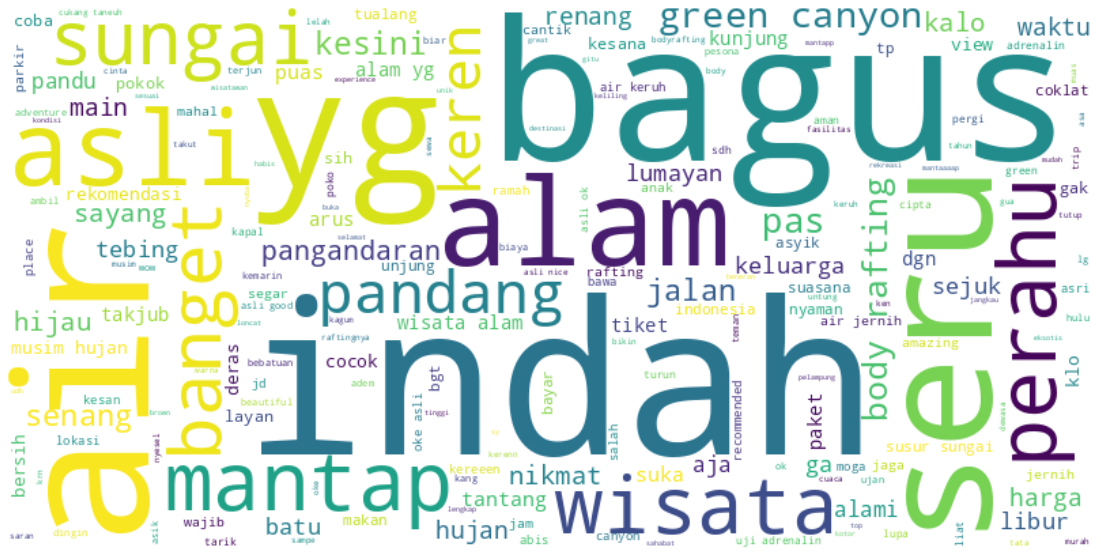

In [72]:
all_str = " ".join(pangandaran_nonan["komentar"].values)
bintang_1 = " ".join(pangandaran_nonan[pangandaran_nonan["bintang"] == 1]["komentar"].values)
bintang_2 = " ".join(pangandaran_nonan[pangandaran_nonan["bintang"] == 2]["komentar"].values)
bintang_3 = " ".join(pangandaran_nonan[pangandaran_nonan["bintang"] == 3]["komentar"].values)
bintang_4 = " ".join(pangandaran_nonan[pangandaran_nonan["bintang"] == 4]["komentar"].values)
bintang_5 = " ".join(pangandaran_nonan[pangandaran_nonan["bintang"] == 5]["komentar"].values)

wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_str)

plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

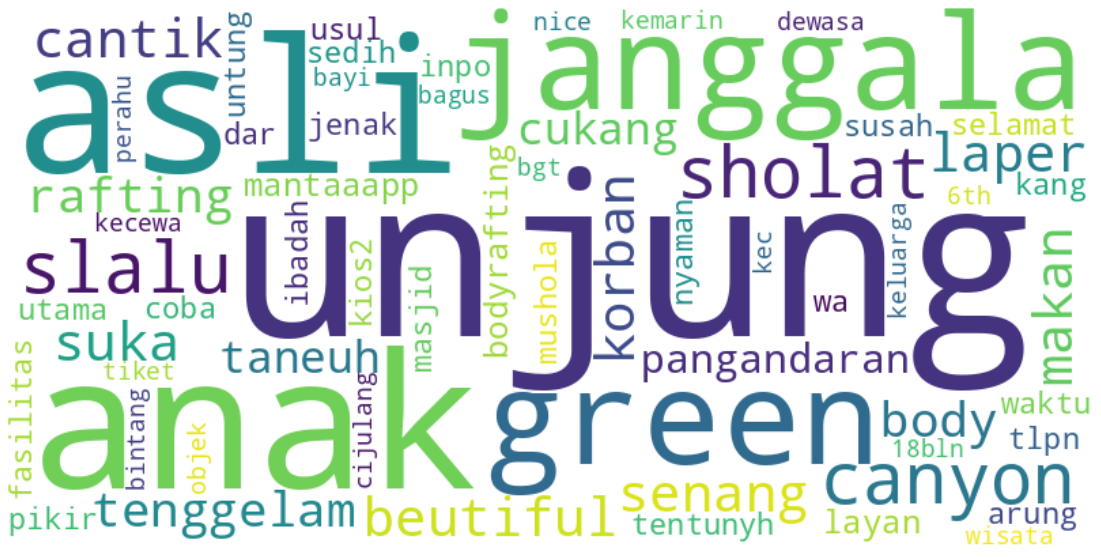

In [73]:
wordcloud = WordCloud(width=800, height=400,
                      background_color="white").generate(bintang_1)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


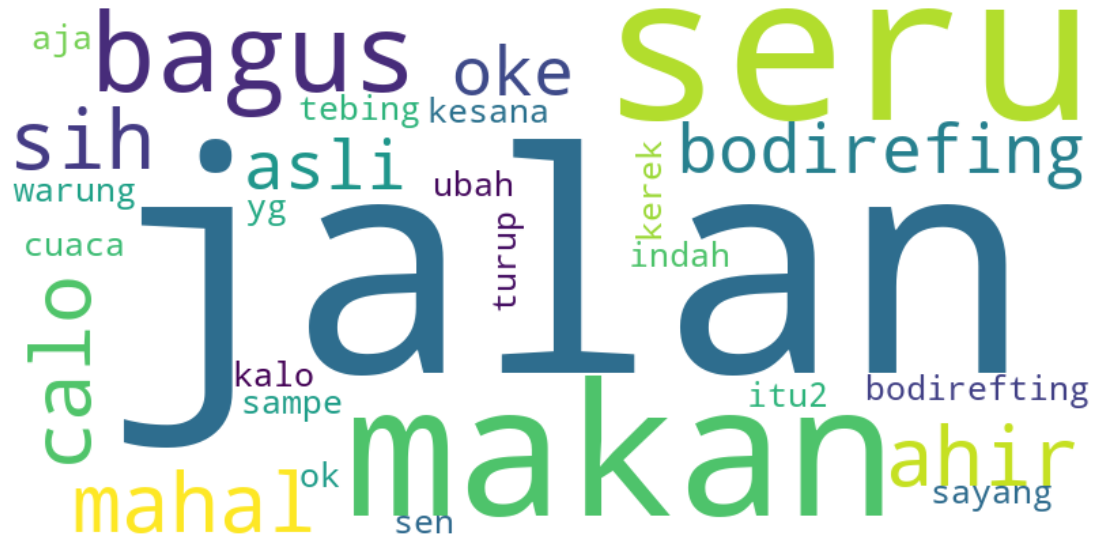

In [75]:
wordcloud = WordCloud(width=800, height=400,
                      background_color="white").generate(bintang_2)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


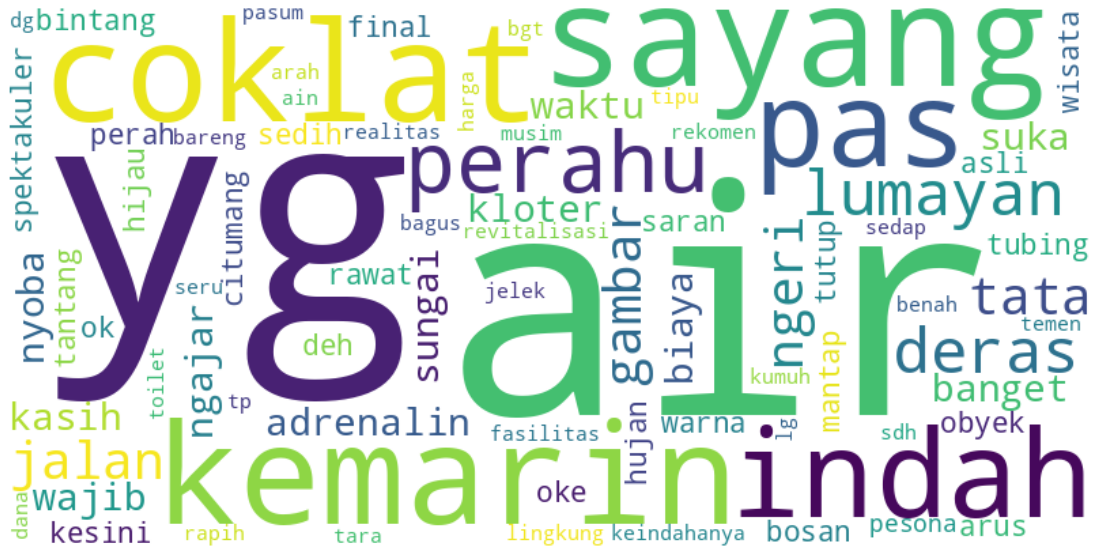

In [76]:
wordcloud = WordCloud(width=800, height=400,
                      background_color="white").generate(bintang_3)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


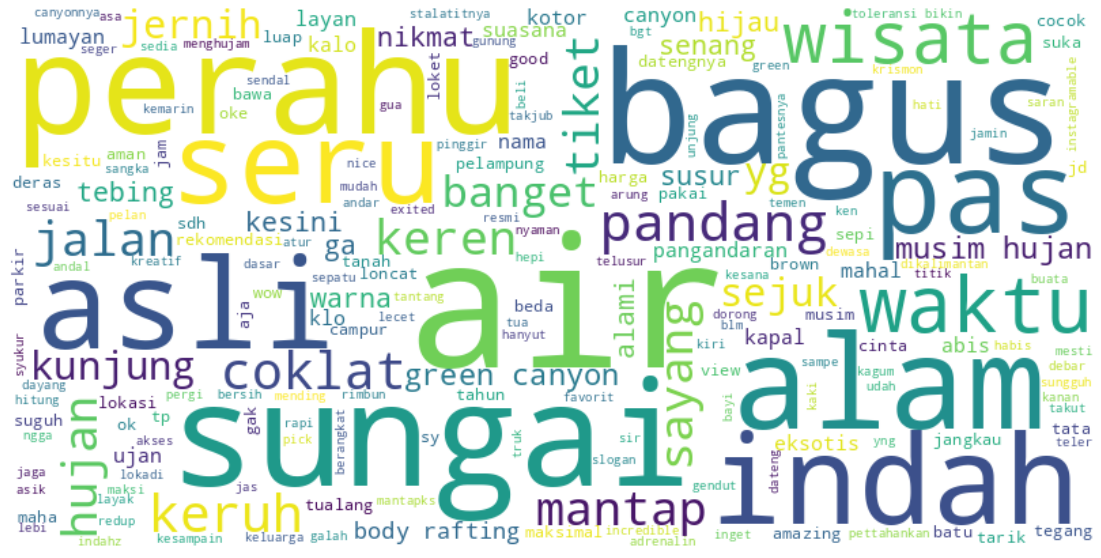

In [77]:
wordcloud = WordCloud(width=800, height=400,
                      background_color="white").generate(bintang_4)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


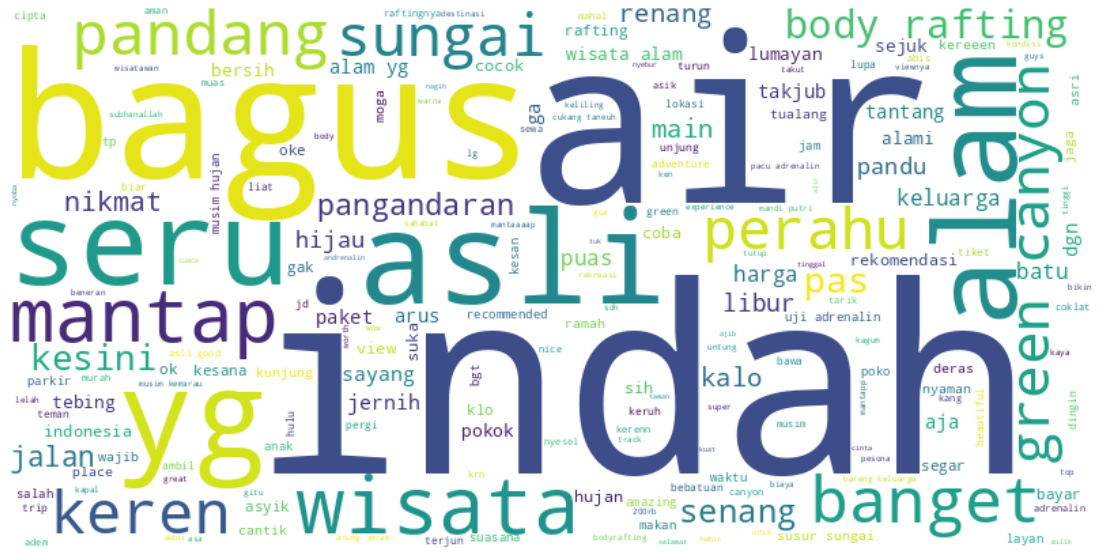

In [78]:
wordcloud = WordCloud(width=800, height=400,
                      background_color="white").generate(bintang_5)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


# Clean

In [79]:
def clean_text(data: pd.DataFrame) -> pd.DataFrame:
    def remove_trailing_char(st):
        s_arr = st.split(" ")
        hasil = []
        for s in s_arr:
            unique_char = set(s)
            for char in unique_char:
                if s.count(char) > 2:
                    s = s.replace(char*s.count(char), char)
            hasil.append(s)

        return " ".join(hasil)

    stemmer = StemmerFactory().create_stemmer()
    stopword = StopWordRemoverFactory().create_stop_word_remover()

    data = data.dropna()
    data["komentar"] = data["komentar"].str.lower()
    data["komentar"] = data["komentar"].apply(lambda x: x.replace("(diterjemahkan oleh google)", ""))
    data["komentar"] = data["komentar"].apply(lambda x: x.replace("\n", " "))
    data["komentar"] = data["komentar"].str.replace('[^\w\s]', ' ')
    data["komentar"] = data["komentar"].str.replace('²', ' ')
    data["komentar"] = data["komentar"].apply(lambda x: x.strip())
    data["komentar"] = data["komentar"].apply(stemmer.stem)
    data["komentar"] = data["komentar"].apply(stopword.remove)
    data["komentar"] = data["komentar"].apply(lambda x: remove_trailing_char(x))

    return data

clean_text(pangandaran).head()

,nama,bintang,komentar
2,Vintanamal,5,bagus
3,Djoko Nugroho,5,keindahaannya afdol klu green canyon bodyrafti...
6,Indri Aditriani,5,tour gaet keren banget aman amanah banget jaga...
8,rinaldy Chaerul,5,tegang senang recomended libur
10,Ratih Rahayu,5,untung pas kunjung air bening
